In [82]:
library(QFASA)
library(dplyr)
library(ggplot2)
library(tidyr)

# Fatty acid names

In [36]:
fa.names = read.csv(file=system.file("exdata", "FAset.csv", package="QFASA"), as.is=TRUE)

# Predator fatty acid signatures

Saving 7 x 7 in image


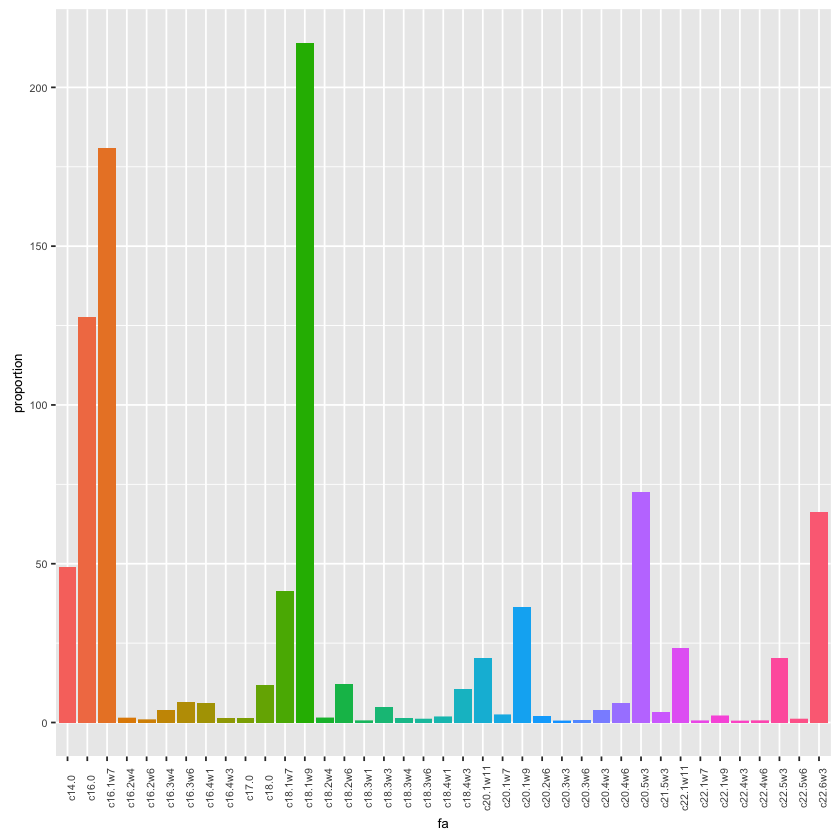

In [139]:
predators = read.csv(file=system.file("exdata", "predatorFAs.csv", package="QFASA"))
predators <- predators %>% dplyr::select_(.dots = fa.names$FA)
predators.narrow <- predators %>% tidyr::gather(fa, proportion) %>% dplyr::mutate(fa=as.factor(fa))

ggplot(data=predators.narrow, aes(x=fa, y=proportion, fill=fa)) + 
    geom_bar(stat='identity') + 
    theme(text=element_text(size=8),
          axis.text.x  = element_text(angle=90)) +
    guides(fill=FALSE)
ggsave(file='predator_fas_bar.png')

# Prey fatty acid signatures

Saving 7 x 7 in image


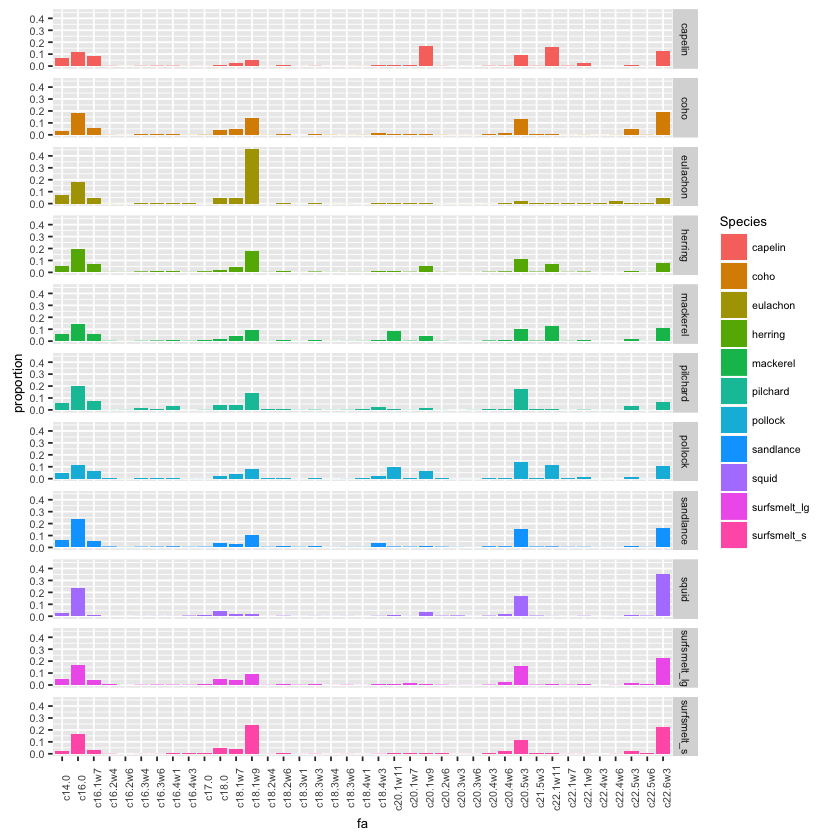

In [145]:
prey = read.csv(file=system.file("exdata", "preyFAs.csv", package="QFASA"))

# Select only relevant fatty acid proportions from samples and re-normalize
prey <- prey %>% dplyr::select_(.dots = fa.names$FA) %>%
    dplyr::mutate(sum=rowSums(.)) %>% 
    dplyr::mutate_each(funs(./sum), -sum) %>%
    dplyr::mutate(Species=prey$Species) %>%
    dplyr::group_by(Species) %>%
    dplyr::summarize_each(funs(mean)) %>%
    dplyr::select(-sum)

prey.narrow <- prey %>% tidyr::gather(fa, proportion, -Species) %>% dplyr::mutate(fa=as.factor(fa))
ggplot(data=prey.narrow, aes(x=fa, y=proportion, fill=Species)) + 
    geom_bar(stat='identity') + 
    theme(text=element_text(size=8),
          axis.text.x  = element_text(angle=90)) +
    facet_grid(Species ~ .) 
ggsave(file='prey_fas_bar.png')

In [152]:
#renormalize over 1
prey.sub = prey.sub / apply(prey.sub, 1, sum) 

#extract the modelling group names from the full file
group = as.vector(prey$Species) 

#add modelling group names to the subsetted and renormalized FAs
prey.matrix = cbind(group,prey.sub)

#create an average value for the FA signature for each designated modelling group
prey.matrix = MEANmeth(prey.matrix) 

ERROR: Error in eval(expr, envir, enclos): object 'prey.sub' not found


ERROR: Error in cbind(group, prey.sub): object 'prey.sub' not found


ERROR: Error in apply(prey.mat[, -1], 2, tapply, prey.mat[, 1], mean): object 'prey.matrix' not found
